In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd

In [41]:
class Simulation:

    def __init__(self, nodes, edges, prob_infect, prob_recover):
        '''
        Set simulation parameters.
        '''
        self.nodes = nodes
        self.edges = edges
        self.prob_infect = prob_infect
        self.prob_recover = prob_recover

    def reset_simulation(self):
        '''
        Initialize node states and clear out the simulation history.
        '''
        for i in self.graph.nodes:
            self.graph.nodes[i]['state'] = 1 if rd.uniform(0, 1) < 0.1 else 0
        self.history = []

    def compute_network_layout(self):
        '''
        Compute the shell layout of the simulation network.
        '''
        nodes_for_degree = {}
        for node in self.graph.nodes:
            degree = self.graph.degree[node]
            nodes_for_degree.setdefault(degree, []).append(node)
        shells = [x[1] for x in sorted(nodes_for_degree.items(), reverse=True)]
        self.layout = nx.shell_layout(self.graph, shells)

    def set_barabasi_albert(self):
        '''
        Set up the simulation to run on a Barabasi-Albert random graph.
        '''
        self.graph = nx.barabasi_albert_graph(self.nodes, self.edges // 2)
        self.compute_network_layout()
        self.reset_simulation()

    def set_watts_strogatz(self):
        '''
        Set up the simulation to run on a Watts-Strogatz random graph.
        '''
        self.graph = nx.watts_strogatz_graph(self.nodes, self.edges, 1)
        self.compute_network_layout()
        self.reset_simulation()

    def set_erdos_renyi(self):
        '''
        Set up the simulation to run on a Erdos-Renyi random graph.
        '''
        self.graph = nx.erdos_renyi_graph(self.nodes, self.edges / (self.nodes - 1))
        self.compute_network_layout()
        self.reset_simulation()

    def observe(self):
        '''
        Plot the network state, degree distribution, and infection history.
        '''
        plt.subplot(1, 2, 1)
        plt.plot(self.history)
        plt.xlabel('step')
        plt.ylabel('proportion infected')
        plt.xlim(0, 500)
        plt.ylim(0, max(self.history) * 1.05 if len(self.history) > 0 else 1)
        plt.title('Step: ' + str(len(self.history)))
        plt.subplot(1, 2, 2)
        nx.draw(
            self.graph, edgelist=[], pos=self.layout,
            node_color=[1 - self.graph.nodes[i]['state'] for i in self.graph.nodes],
            alpha=[self.graph.nodes[i]['state'] * 0.5 + 0.5 for i in self.graph.nodes],
            vmin=0, vmax=1, node_size=10)
        #plt.show()
    def update(self):
        '''
        Update the network state.
        '''
        new_state = {}
        for a in self.graph.nodes:
            if self.graph.nodes[a]['state'] == 0:  # If node is susceptible
                new_state[a] = 0
                for b in self.graph.neighbors(a):  # Check if neighbors are infected
                    if self.graph.nodes[b]['state'] == 1:
                        new_state[a] = 1 if rd.uniform(0, 1) < self.prob_infect else 0
                        if new_state[a] == 1:
                            # Just got infected, so we can stop checking
                            break
            else: # If node is infected
                new_state[a] = 0 if rd.uniform(0, 1) < self.prob_recover else 1
        for i in self.graph.nodes:
            self.graph.nodes[i]['state'] = new_state[i]
        self.history.append(sum(new_state.values()) / len(new_state))

Nodes: 1000
Average degree: 19.846
Infection rate: 0.01
Recovery rate: 0.22


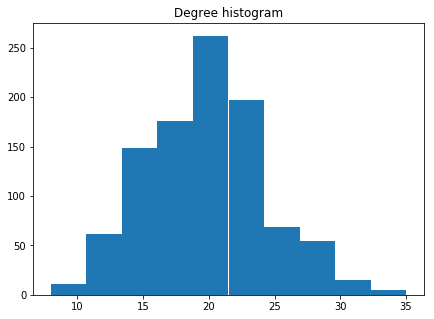

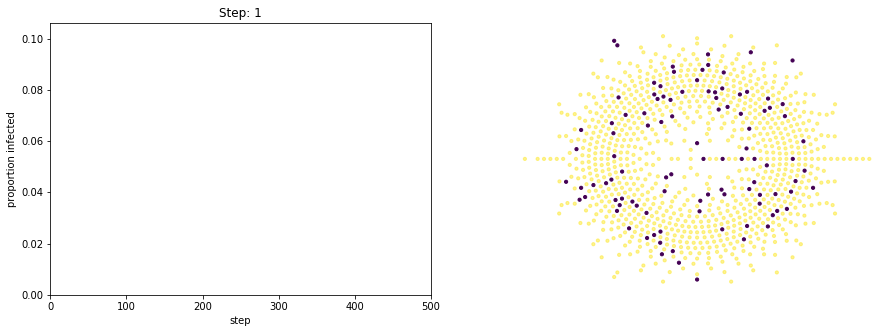

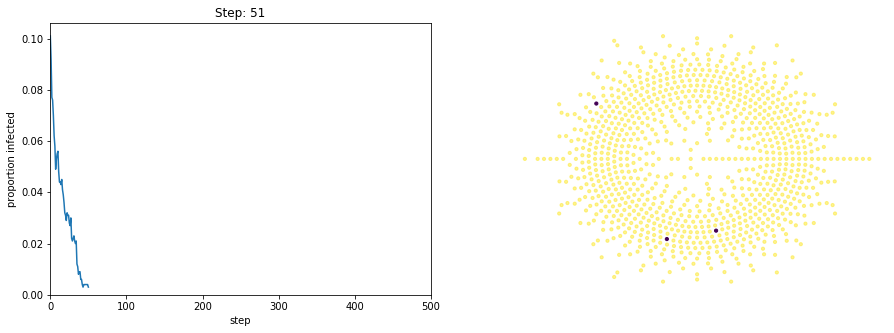

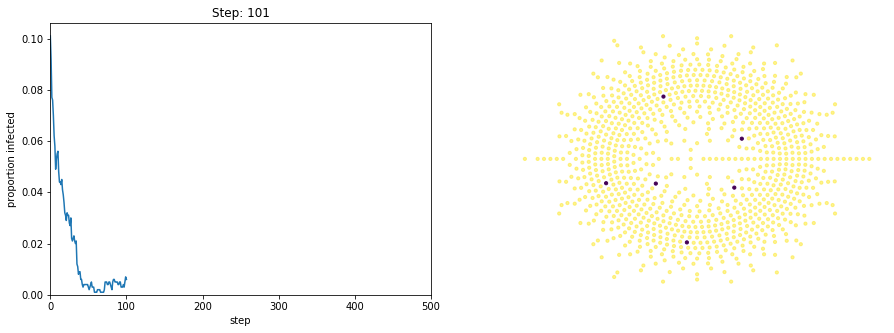

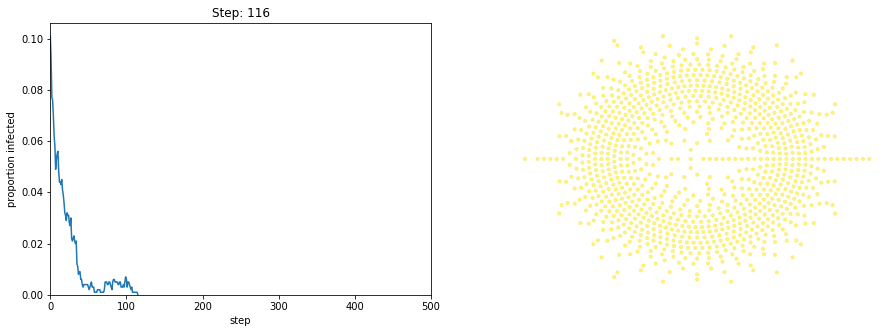

In [13]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.22)  # recovery probability

sim.set_erdos_renyi()
# sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

plt.figure(figsize=(7, 5))
plt.hist(degrees)
plt.title('Degree histogram')

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 50 == 0:
        sim.observe()

Nodes: 1000
Average degree: 20.014
Infection rate: 0.01
Recovery rate: 0.18


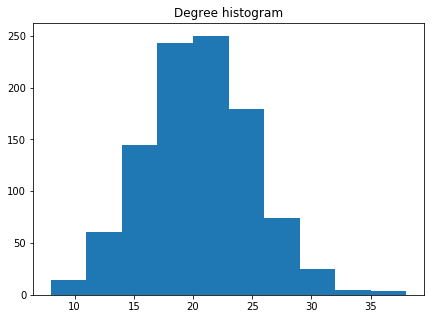

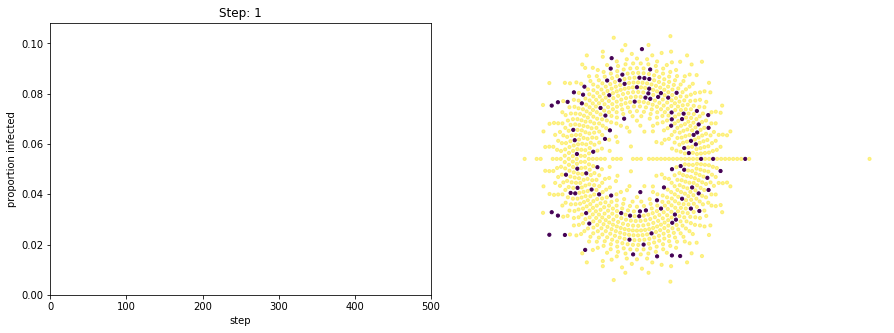

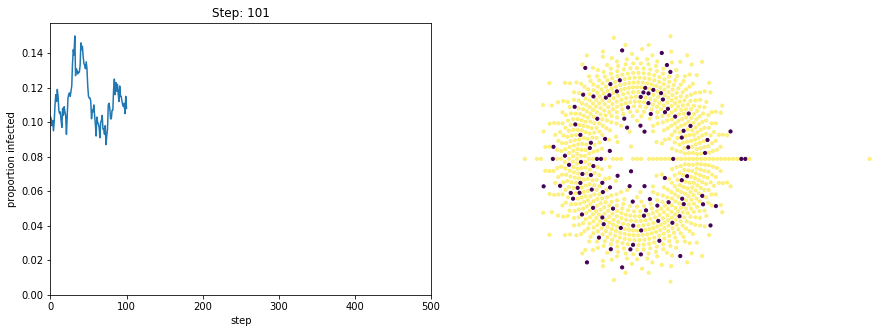

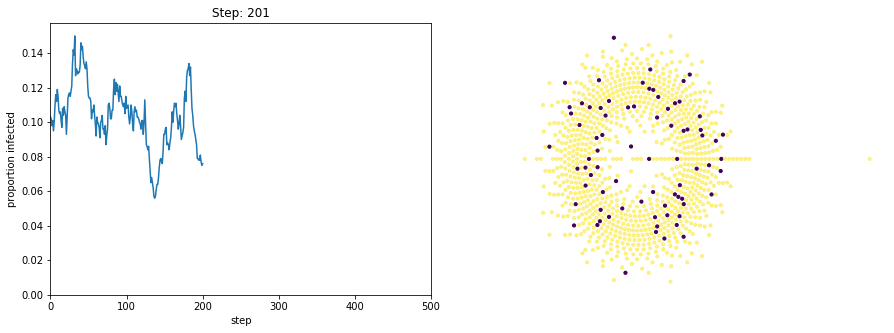

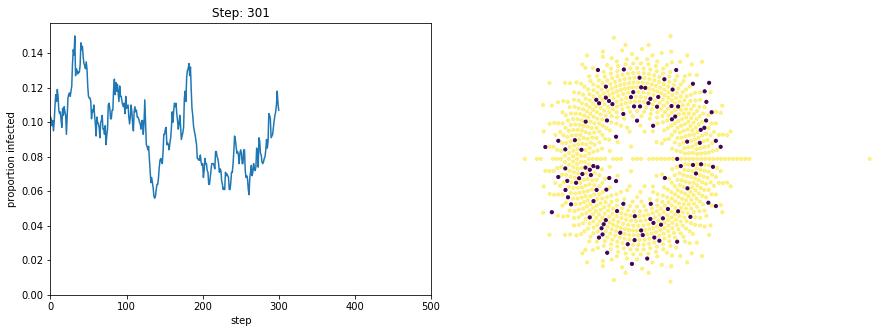

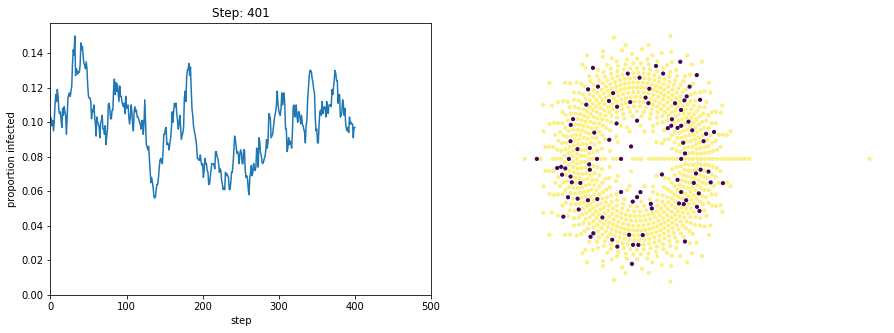

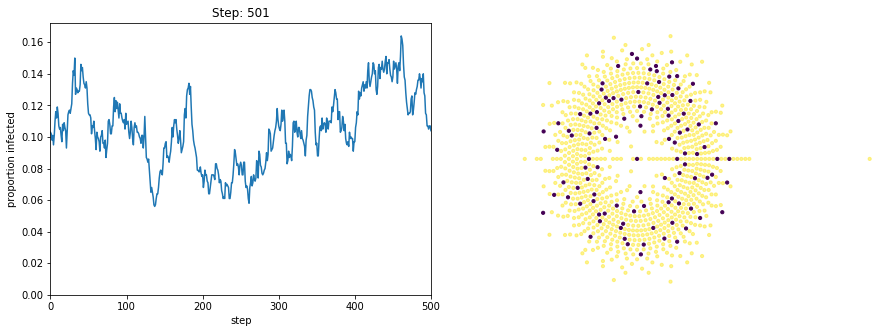

In [20]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.18)  # recovery probability

sim.set_erdos_renyi()
# sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

plt.figure(figsize=(7, 5))
plt.hist(degrees)
plt.title('Degree histogram')

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

Nodes: 1000
Average degree: 20.0
Infection rate: 0.01
Recovery rate: 0.18


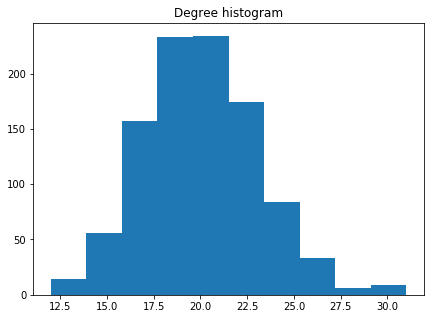

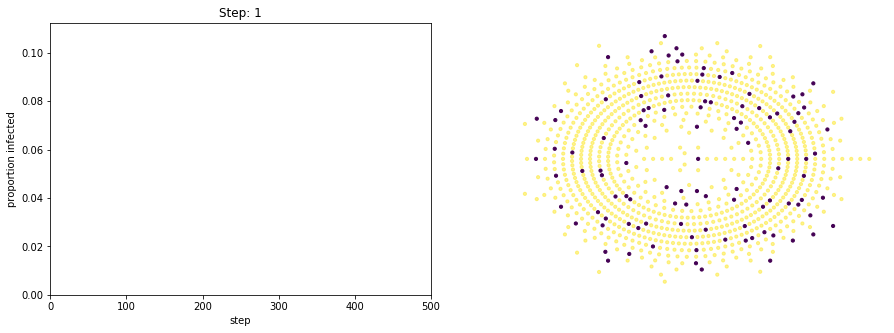

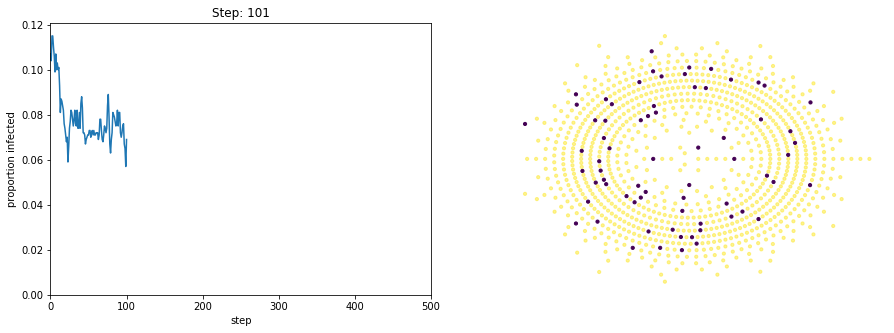

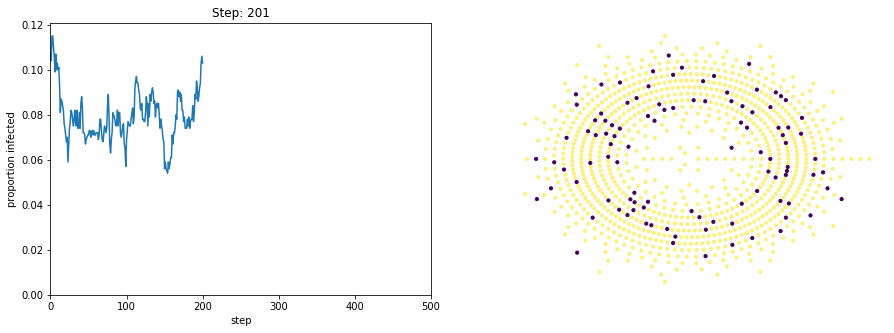

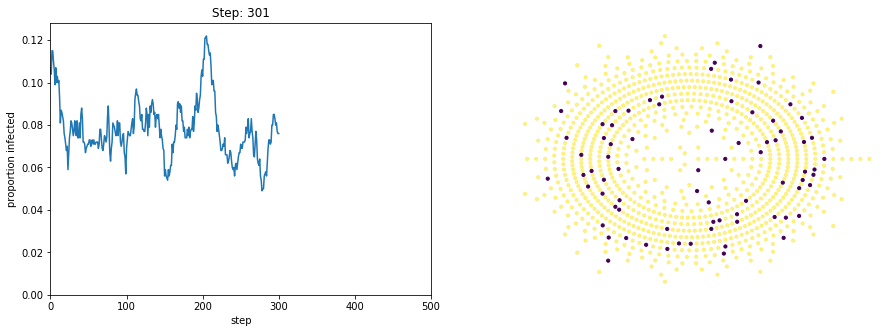

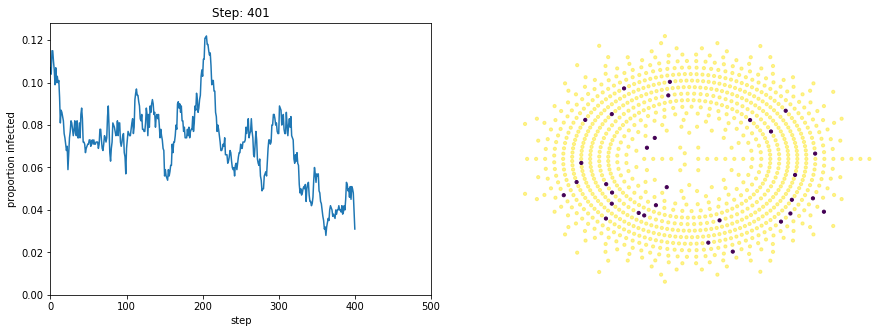

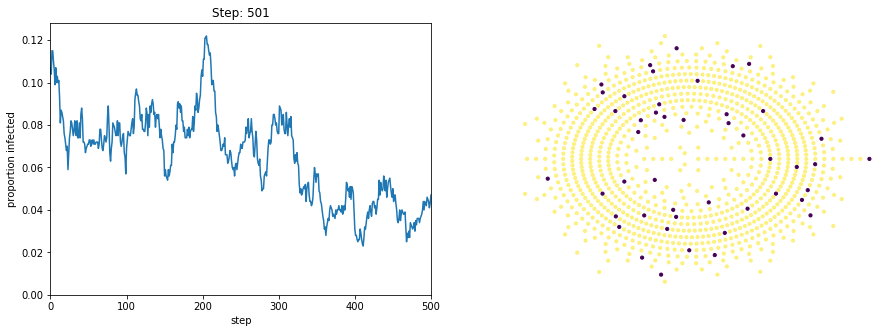

In [23]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.18)  # recovery probability

# sim.set_erdos_renyi()
sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

plt.figure(figsize=(7, 5))
plt.hist(degrees)
plt.title('Degree histogram')

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

Nodes: 1000
Average degree: 19.8
Infection rate: 0.01
Recovery rate: 0.22


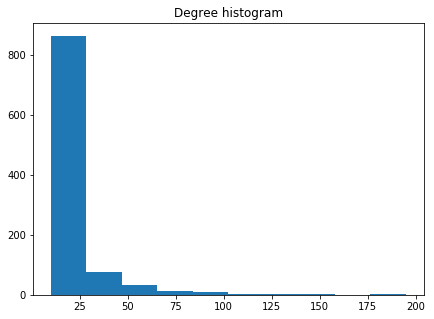

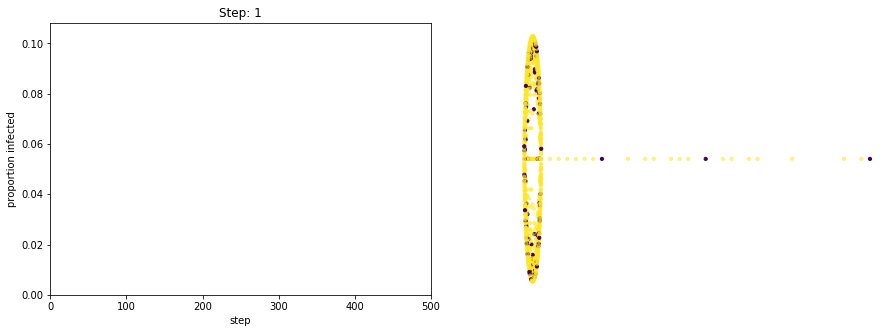

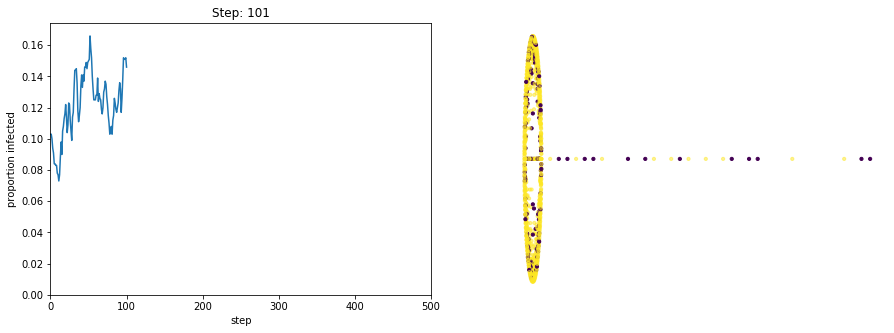

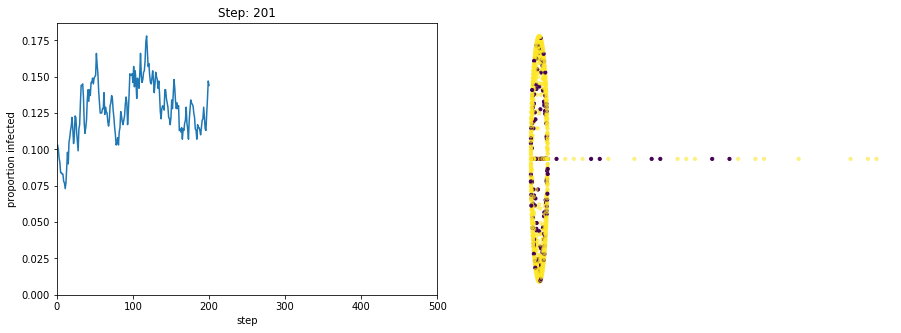

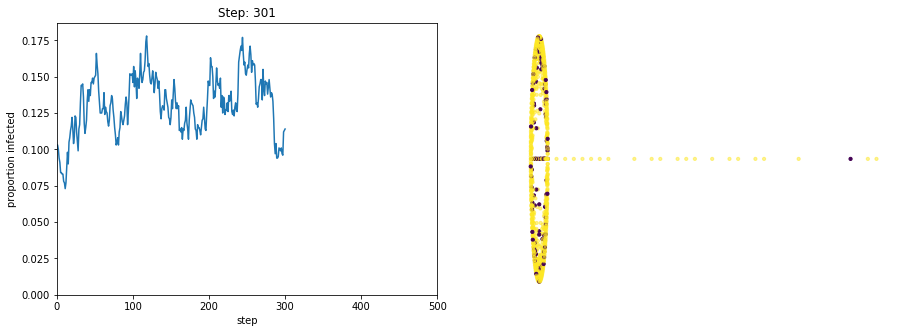

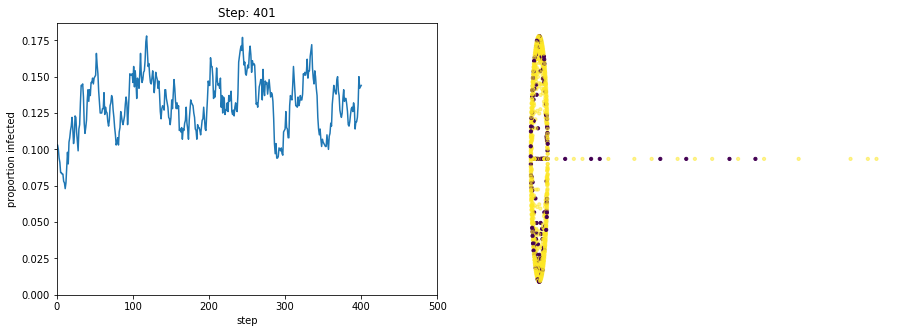

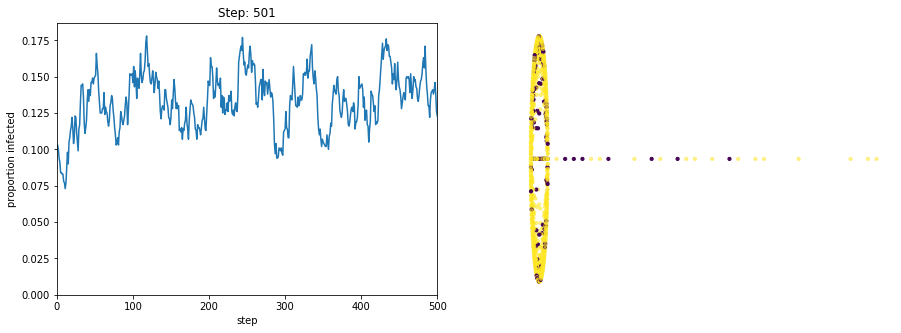

In [45]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.22)  # recovery probability

# sim.set_erdos_renyi()
# sim.set_watts_strogatz()
sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

plt.figure(figsize=(7, 5))
plt.hist(degrees)
plt.title('Degree histogram')

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        plt.figure(figsize=(15, 5))
        sim.observe()
        break
    if step % 100 == 0:
        plt.figure(figsize=(15, 5))
        sim.observe()